## Import Packages 

In [124]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')


In [125]:
teledata = pd.read_csv('E:\PG Diploma\TelecomChurnCaseStudy-main/telecom_churn_data.csv')

In [126]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [127]:
teledata.shape

(99999, 226)

In [128]:
teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [129]:
teledata.isna().mean().round(4) * 100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

###### Deriving new features 

To calculate the average recharge amount we need to have the recharge amount for both call and mobile data / sms recharge.

But we are already been provided with the  recharge amount for call so need to calculate the average amount for the data/sms 

In [130]:
teledata['total_rech_amt_data_6'] = teledata['total_rech_data_6'] * teledata['av_rech_amt_data_6']

In [131]:
teledata['total_rech_amt_data_7'] = teledata['total_rech_data_7'] * teledata['av_rech_amt_data_7']
teledata['total_rech_amt_data_8'] = teledata['total_rech_data_8'] * teledata['av_rech_amt_data_8']
teledata['total_rech_amt_data_9'] = teledata['total_rech_data_9'] * teledata['av_rech_amt_data_9']

In [132]:
teledata.shape


(99999, 230)

Now we can drop the columns total_rech_data and av_rech_amnt_data as we have derived new column from this columns

In [133]:
teledata.drop(['total_rech_data_6' , 'total_rech_data_7' , 'total_rech_data_8' , 'total_rech_data_9' , 'av_rech_amt_data_6' , 'av_rech_amt_data_7' , 'av_rech_amt_data_8' , 'av_rech_amt_data_9'] , axis=1 , inplace=True)

###### Filter High value customers 

In [134]:
# Average recharge amount for 6 and 7 month that is good phase
avg_rch_amount_67 = (teledata['total_rech_amt_data_6'].fillna(0) + teledata['total_rech_amt_data_7'].fillna(0) + teledata['total_rech_amt_6'].fillna(0) + teledata['total_rech_amt_7'].fillna(0)) / 2

In [135]:
#Getting the 70th percentile
seventy_percentile = np.percentile(avg_rch_amount_67 , 70)

In [136]:
#Filtereing the data on the 70th percentile
teledata = teledata[avg_rch_amount_67 >= seventy_percentile]

In [137]:
teledata.shape

(30001, 222)

###### Tag customers churn and non-churn

In [138]:
# tagging churner
teledata['churn'] = np.where(teledata[['total_ic_mou_9' , 'total_og_mou_9' , 'vol_2g_mb_9' , 'vol_3g_mb_9']].sum(axis=1) == 0 , 1 , 0)

In [139]:
teledata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [140]:
#Remove all the columns haivng _9 in the column name
teledata = teledata[teledata.columns.drop(list(teledata.filter(regex='_9')))]

#### Since date of last rech in each month only provides when user recharged their SIM, we can delete last_date of rech column for all 3 months

In [141]:
teledata.drop(["date_of_last_rech_8","date_of_last_rech_8","date_of_last_rech_8"],axis=1,inplace=True)

In [142]:
teledata.shape

(30001, 169)

## Exploratory Data Analysis 

Steps to be preformed:
1. Missing value treatment
2. Removing the non-unique values
3. Outlier treatment
4. Remove highly correlated values
5. Convert the columns to appropraite format

###### MIssing value treatment 

In [143]:
teledata.isna().mean().round(4) * 100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.75
std_og_t2o_mou               0.75
loc_ic_t2o_mou               0.75
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.82
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.82
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.82
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.82
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.82
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.82
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou

In [144]:
nan_loans = round(teledata.isnull().sum()/len(teledata) , 4)

In [145]:
nan_columns_list = list(nan_loans[nan_loans > 0.3000].index)
len(nan_columns_list)

27

There are 27 columns with more than 30% missing values so we will dropping them as they are not needed for further analysis

In [146]:
teledata.drop(nan_columns_list, axis = 1 , inplace=True)

In [147]:
teledata.isna().mean().round(4) * 100

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou

There are still few columns which has missing values around 1% to 4% but before that we can check for the uniqueness in columns and will treat the further missing values

In [148]:
non_unqiue_columns = ['loc_og_t2o_mou' , 'std_og_t2o_mou' , 'loc_ic_t2o_mou' , 'last_date_of_month_7' , 'last_date_of_month_8' , 'last_date_of_month_6' , 'std_og_t2c_mou_8' , 'std_og_t2c_mou_7' , 'std_og_t2c_mou_6' , 'circle_id' , 'std_ic_t2o_mou_6' , 'std_ic_t2o_mou_7' , 'std_ic_t2o_mou_8']

In [149]:
teledata.drop(non_unqiue_columns , axis=1 , inplace=True)

In [150]:
teledata.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,29456.000000,29464.00000,28827.000000,29456.000000,29464.000000,28827.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,265.618262,272.700470,243.646938,380.608111,384.994337,348.723294,16.408431,12.872921,13.009645,27.063178,20.519370,20.674656,86.047905,87.235755,81.256858,166.263652,165.980922,157.937216,6.461494,6.540759,6.126112,1.604247,1.924320,1.777295,258.781428,259.765948,245.328371,168.954534,177.409496,154.486547,182.753296,191.345743,163.758261,1.836917,1.859332,1.649273,353.548540,370.618355,319.897555,2.211703,2.144122,2.028343,5.925921,7.238206,6.824251,0.673323,0.043687,0.05995

As we can almost see all columns have outliers so we can either fill the missing values with the median or drop the rows with the missing values

In [151]:
teledata.isna().mean().round(4) * 100


mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
offnet_mou_6           1.82
offnet_mou_7           1.79
offnet_mou_8           3.91
roam_ic_mou_6          1.82
roam_ic_mou_7          1.79
roam_ic_mou_8          3.91
roam_og_mou_6          1.82
roam_og_mou_7          1.79
roam_og_mou_8          3.91
loc_og_t2t_mou_6       1.82
loc_og_t2t_mou_7       1.79
loc_og_t2t_mou_8       3.91
loc_og_t2m_mou_6       1.82
loc_og_t2m_mou_7       1.79
loc_og_t2m_mou_8       3.91
loc_og_t2f_mou_6       1.82
loc_og_t2f_mou_7       1.79
loc_og_t2f_mou_8       3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
std_og_t2t_mou_6       1.82
std_og_t2t_mou_7       1.79
std_og_t2t_mou_8       3.91
std_og_t2m_mou_6       1.82
std_og_t2m_mou_7    

### Since all the missing values in column is under 8% and we have large amount of data set. Hence we can delete all the missing value ROWS

In [152]:
teledata=teledata.dropna()

In [153]:
teledata.shape

(28419, 129)

In [154]:
teledata.isna().mean().round(4) * 100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

In [155]:
## Derived Feature creation

In [156]:
# # Calculating total call usage (incoming + outgoing)
# teledata['total_calls_mou_6'] = teledata.total_ic_mou_6 + teledata.total_og_mou_6
# teledata['total_calls_mou_7'] = teledata.total_ic_mou_7 + teledata.total_og_mou_7
# teledata['total_calls_mou_'] = teledata.total_ic_mou_8 + teledata.total_og_mou_8

In [157]:
# Calcultae total internet consumption ( 2g + 3g)
# teledata['total_internet_mb_6'] =  teledata.vol_2g_mb_6 + teledata.vol_3g_mb_6
# teledata['total_internet_mb_7'] =  teledata.vol_2g_mb_7 + teledata.vol_3g_mb_7
# teledata['total_internet_mb_8'] =  teledata.vol_2g_mb_8 + teledata.vol_3g_mb_8

In [158]:

print(teledata.churn.value_counts()*100/teledata.shape[0])

0    94.422745
1     5.577255
Name: churn, dtype: float64


In [159]:
### We need to further derive variable that shows the decline in usage from 6 & 7 month to 8th month (AVG of 6th & 7 th)
teledata['arpu_diff'] = teledata.arpu_8 - ((teledata.arpu_6 + teledata.arpu_7)/2)

teledata['onnet_mou_diff'] = teledata.onnet_mou_8 - ((teledata.onnet_mou_6 + teledata.onnet_mou_7)/2)

teledata['offnet_mou_diff'] = teledata.offnet_mou_8 - ((teledata.offnet_mou_6 + teledata.offnet_mou_7)/2)

teledata['roam_ic_mou_diff'] = teledata.roam_ic_mou_8 - ((teledata.roam_ic_mou_6 + teledata.roam_ic_mou_7)/2)

teledata['roam_og_mou_diff'] = teledata.roam_og_mou_8 - ((teledata.roam_og_mou_6 + teledata.roam_og_mou_7)/2)

teledata['loc_og_mou_diff'] = teledata.loc_og_mou_8 - ((teledata.loc_og_mou_6 + teledata.loc_og_mou_7)/2)

teledata['std_og_mou_diff'] = teledata.std_og_mou_8 - ((teledata.std_og_mou_6 + teledata.std_og_mou_7)/2)

teledata['isd_og_mou_diff'] = teledata.isd_og_mou_8 - ((teledata.isd_og_mou_6 + teledata.isd_og_mou_7)/2)

teledata['spl_og_mou_diff'] = teledata.spl_og_mou_8 - ((teledata.spl_og_mou_6 + teledata.spl_og_mou_7)/2)

teledata['total_og_mou_diff'] = teledata.total_og_mou_8 - ((teledata.total_og_mou_6 + teledata.total_og_mou_7)/2)

teledata['loc_ic_mou_diff'] = teledata.loc_ic_mou_8 - ((teledata.loc_ic_mou_6 + teledata.loc_ic_mou_7)/2)

teledata['std_ic_mou_diff'] = teledata.std_ic_mou_8 - ((teledata.std_ic_mou_6 + teledata.std_ic_mou_7)/2)

teledata['isd_ic_mou_diff'] = teledata.isd_ic_mou_8 - ((teledata.isd_ic_mou_6 + teledata.isd_ic_mou_7)/2)

teledata['spl_ic_mou_diff'] = teledata.spl_ic_mou_8 - ((teledata.spl_ic_mou_6 + teledata.spl_ic_mou_7)/2)

teledata['total_ic_mou_diff'] = teledata.total_ic_mou_8 - ((teledata.total_ic_mou_6 + teledata.total_ic_mou_7)/2)

teledata['total_rech_num_diff'] = teledata.total_rech_num_8 - ((teledata.total_rech_num_6 + teledata.total_rech_num_7)/2)

teledata['total_rech_amt_diff'] = teledata.total_rech_amt_8 - ((teledata.total_rech_amt_6 + teledata.total_rech_amt_7)/2)

teledata['max_rech_amt_diff'] = teledata.max_rech_amt_8 - ((teledata.max_rech_amt_6 + teledata.max_rech_amt_7)/2)


teledata['vol_2g_mb_diff'] = teledata.vol_2g_mb_8 - ((teledata.vol_2g_mb_6 + teledata.vol_2g_mb_7)/2)

teledata['vol_3g_mb_diff'] = teledata.vol_3g_mb_8 - ((teledata.vol_3g_mb_6 + teledata.vol_3g_mb_7)/2)

In [160]:
teledata['vol_3g_mb_diff'].describe()

count    28419.000000
mean         2.738461
std        601.257795
min     -10466.160000
25%          0.000000
50%          0.000000
75%          0.000000
max      15646.390000
Name: vol_3g_mb_diff, dtype: float64

# Visualization  of Data

In [161]:
teledata.describe(include="all")

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.841900e+04,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419,28419,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000

In [162]:
### Data Categorization


In [163]:
# funtions to be used in data visualization and summary
def insight_univar(variable):
    print(variable.describe())
    sns.distplot(variable)
        
            
# bivariate analysis for numeric variable    
def insight_bivar_num(var1, var2):
    sns.regplot(var1, var2)

# bivariate analysis for categorical variable    
def insight_bivar_cat(var1, var2):
    sns.boxplot(var1, var2)

In [164]:
# Univariate EDA

count         28419
unique           30
top       6/30/2014
freq           8109
Name: date_of_last_rech_6, dtype: object


TypeError: unsupported operand type(s) for /: 'str' and 'int'

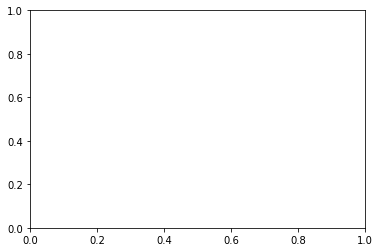

In [165]:
insight_univar(teledata.date_of_last_rech_6)

In [ ]:
insight_univar(teledata.arpu_6)

In [ ]:
insight_univar(teledata.onnet_mou_8)

In [ ]:
insight_univar(teledata.total_calls_mou_7)

In [ ]:
insight_univar(teledata.total_calls_mou_8)

In [ ]:
insight_univar(teledata.offnet_mou_8)

#### mostly data is skwed towards the left

# Bivariate EDA

In [ ]:
insight_bivar_cat(teledata.churn, teledata.aon)

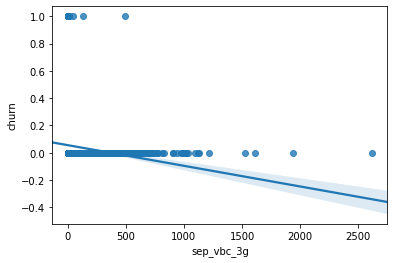

In [45]:
insight_bivar_num(teledata.sep_vbc_3g, teledata.churn)

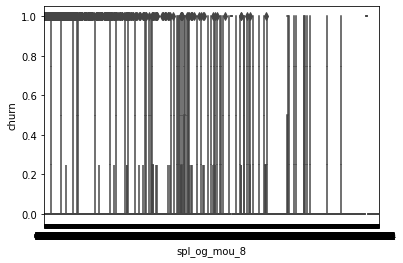

In [46]:
insight_bivar_cat(teledata.spl_og_mou_8, teledata.churn)

In [50]:
pd.crosstab(teledata.churn, teledata.arpu_diff, normalize='columns')*100

arpu_diff,-4598.7115,-3895.7845,-3164.4350,-2950.5065,-2933.5545,-2812.0890,-2807.8845,-2595.9850,-2313.8670,-2103.2745,-2101.8240,-2045.4245,-2042.8050,-1999.5270,-1985.5625,-1911.1610,-1856.5585,-1789.1525,-1783.8190,-1777.0040,-1758.1990,-1723.8445,-1715.1550,-1711.6075,-1695.1120,-1689.0390,-1679.5150,-1667.0355,-1658.3700,-1645.0955,-1629.7400,-1615.4080,-1599.3810,-1588.1885,-1582.4110,-1524.2775,-1520.6600,-1513.1840,-1511.3720,-1507.4620,-1492.4385,-1490.8960,-1479.1815,-1467.0040,-1464.8460,-1454.0985,-1453.9045,-1444.6445,-1431.2345,-1420.8845,-1418.8565,-1418.4555,-1415.9510,-1415.4285,-1398.5835,-1397.8115,-1397.6145,-1367.5645,-1366.3160,-1364.2250,-1357.5495,-1355.3855,-1354.7810,-1351.0030,-1350.7070,-1343.2615,-1337.8345,-1337.0550,-1315.1575,-1312.3855,-1311.9265,-1303.6985,-1296.5050,-1292.2125,-1286.8375,-1282.3205,-1282.2635,-1279.8380,-1263.0515,-1262.1440,-1260.6965,-1254.9635,-1249.5340,-1243.7250,-1241.9810,-1241.5925,-1224.6735,-1222.0550,-1207.9895,-1207.7320,-1207.1820,-1201.4405,-1195.8360,-1193.8350,-1193.1405,-1193.0760,-1193.0035,-1191.2220,-1187.3200,-1187.0385,-1184.6880,-1179.2845,-1177.8540,-1165.4030,-1157.1675,-1156.7710,-1156.5650,-1154.6500,-1151.8690,-1149.6570,-1142.5940,-1139.0620,-1136.3270,-1133.3235,-1131.3845,-1125.8885,-1125.2160,-1124.8040,-1122.8195,-1119.2735,-1113.0400,-1110.6530,-1110.1485,-1108.8030,-1105.8330,-1104.8885,-1102.5095,-1102.3925,-1097.2475,-1092.1435,-1089.1300,-1082.6630,-1082.5650,-1080.4465,-1075.6520,-1073.4200,-1071.7950,-1068.5760,-1068.5220,-1065.0650,-1063.4140,-1059.9635,-1059.5885,-1057.8770,-1055.8225,-1054.4720,-1054.3195,-1052.8175,-1052.5810,-1051.6900,-1051.5770,-1049.9495,-1047.5870,-1045.7075,-1045.3810,-1044.8120,-1043.4400,-1041.9275,-1039.6260,-1038.6880,-1036.4145,-1027.8470,-1026.2420,-1025.8770,-1024.5745,-1022.1010,-1019.7750,-1019.5020,-1019.3825,-1018.4520,-1017.3500,-1016.0280,-1015.7590,-1015.4860,-1007.9920,-1006.2295,-1005.3400,-1003.9470,-1002.1330,-1001.7480,-1001.7035,-998.5855,-998.0995,-995.6315,-995.2780,-994.1900,-992.4270,-990.7410,-989.3515,-988.2290,-987.6500,-986.1210,-982.5235,-979.9205,-979.0315,-977.6630,-976.5555,-975.0020,-969.6715,-967.7615,-967.6670,-966.6030,-966.0625,-965.6545,-963.4505,-962.5070,-958.9315,-957.3905,-957.1565,-956.2670,-955.6055,-953.2700,-950.8155,-948.9385,-948.5390,-948.0595,-947.4850,-946.4740,-945.9455,-945.0195,-944.6450,-943.2295,-938.2955,-938.1900,-935.0100,-934.1760,-930.8205,-930.2790,-930.0585,-928.6915,-928.2705,-927.2885,-927.2540,-926.5425,-926.2235,-922.0575,-919.9915,-919.5560,-917.5895,-916.9660,-916.3730,-915.9680,-915.9045,-915.6640,-914.9000,-914.7270,-914.5580,-913.8875,-912.1000,-912.0765,...,865.7535,865.7740,870.6125,871.2900,876.0630,876.4370,876.7200,879.1520,879.9800,882.3560,885.9440,887.1260,887.6315,889.0000,893.1015,898.7665,901.9045,906.3395,906.4090,907.4705,910.2075,910.8465,911.3720,912.6140,915.0475,915.8725,917.5550,919.4945,922.1480,922.1600,924.4355,925.6050,927.0485,927.8205,928.2545,928.4120,930.3235,930.4185,932.9330,933.1260,934.7245,935.0045,936.0530,939.1885,941.0125,941.5100,945.0770,946.8245,947.4440,949.9180,950.3250,950.8905,953.9375,954.4960,955.0520,957.3960,967.9580,968.7805,969.4620,973.7495,975.1415,975.9300,980.0455,981.9500,982.5320,983.9735,984.6165,985.6415,993.4505,1000.0360,1000.3925,1002.1300,1003.6060,1005.3390,1007.4550,1007.9680,1009.2640,1010.9505,1011.1785,1014.6125,1014.8935,1018.9400,1020.5710,1021.2090,1022.5535,1022.9200,1023.5220,1025.3650,1026.5045,1028.3780,1029.2860,1029.5685,1030.1810,1030.8585,1038.3040,1038.4490,1040.4335,1040.6800,1043.0175,1044.1395,1045.3700,1059.8260,1059.9410,1061.0040,1061.4015,1061.7945,1064.0760,1066.2410,1068.9600,1075.4155,1078.9970,1085.7480,1093.9925,1105.0320,1114.7610,1115.8210,1116.9330,1121.8120,1123.6540,1127.4975,1128.6490,1128.6805,1129.9435,1134.6735,1134.8880,1138.0695,1144.1085,1145.6765,1151.4700,1153.1915,1154.7105,1157.7015,1160.9810,1167.8945,1172.7610,1179.6715,1183.9120,1185

In [166]:
list(teledata.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [167]:
teledata.describe(include="all")

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,2.841900e+04,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419,28419,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000000,28419.000

In [58]:
pd.crosstab(teledata.churn, teledata.sachet_3g_6)

sachet_3g_6,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,28,29
churn,,,,,,,,,,,,,,,,,,,,,,,,,
0,23760,1949,457,170,82,54,34,34,17,17,8,10,4,3,4,4,2,1,3,3,1,3,2,1,2
1,1401,81,18,9,10,4,5,2,1,4,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
pd.crosstab(teledata.churn, teledata.sachet_3g_7)

sachet_3g_7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,31,33
churn,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23750,1839,462,188,107,89,60,24,17,16,11,12,12,5,6,6,1,1,5,3,3,2,3,1,1,1
1,1393,82,23,14,9,2,4,2,1,3,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
pd.crosstab(teledata.churn, teledata.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24112,1566,385,180,104,84,40,33,26,17,15,8,11,10,6,5,2,2,3,1,3,3,2,1,1,1,2,1,1
1,1473,43,5,7,4,2,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelling

## i) Prediction Calculation

In [62]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [75]:
teledata.dtypes

mobile_number            int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_mou_8           float64
std_og_t2t_mou_6       float64
std_og_t

## Train Test Split

In [168]:
# divide data into train and test
X = teledata.drop("churn", axis = 1)
y = teledata.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [169]:
# Shape of train and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21314, 148)
(7105, 148)
(21314,)
(7105,)


In [170]:
X_train.dtypes

mobile_number            int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_mou_8           float64
std_og_t2t_mou_6       float64
std_og_t

## PCA

In [171]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [172]:
pca.fit(X_train)
teledata_pca = pca.fit_transform(X_train)

ValueError: could not convert string to float: '6/29/2014'

mobile_number            int64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_mou_6           float64
loc_og_mou_7           float64
loc_og_mou_8           float64
std_og_t2t_mou_6       float64
std_og_t

In [91]:
# teledata[teledata.date_of_last_rech_8.isna()==True]

6/30/2014    8068
6/29/2014    5123
6/28/2014    3515
6/27/2014    2984
6/26/2014    1740
6/25/2014    1232
6/24/2014     964
6/23/2014     661
6/21/2014     563
6/22/2014     477
6/14/2014     462
6/17/2014     374
6/20/2014     365
6/19/2014     350
6/18/2014     348
6/16/2014     185
6/13/2014     179
6/12/2014     178
6/15/2014     122
6/11/2014      65
6/8/2014       45
6/10/2014      31
6/7/2014       31
6/9/2014       24
6/5/2014       22
6/6/2014       15
6/3/2014       14
6/4/2014       13
6/2/2014        9
6/1/2014        4
Name: date_of_last_rech_6, dtype: int64